In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("/home/rahul/jupyter prt/dataset.xlsx")

In [3]:
df.head()

,input,result
0,206,0
1,205,0
2,204,1
3,203,0
4,202,1


In [4]:
df.shape

(4627, 2)

In [5]:
df.result.unique()

array([0, 1])

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='input', ylabel='Density'>

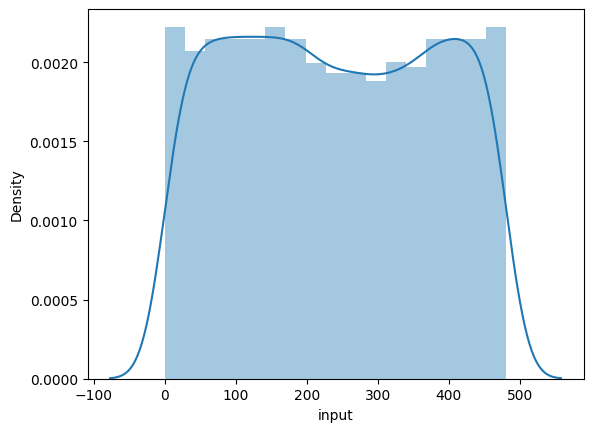

In [6]:
sns.distplot(df['input'])

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='result', ylabel='Density'>

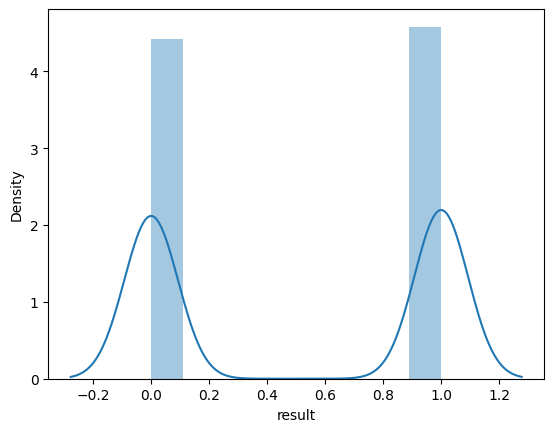

In [7]:
sns.distplot(df['result'])

In [8]:
df.describe()

,input,result
count,4627.000000,4627.000000
mean,239.368273,0.508969
std,140.331858,0.499974
min,1.000000,0.000000
25%,117.000000,0.000000
50%,236.000000,1.000000
75%,365.000000,1.000000
max,480.000000,1.000000


In [9]:
df['input'].describe()

count    4627.000000
mean      239.368273
std       140.331858
min         1.000000
25%       117.000000
50%       236.000000
75%       365.000000
max       480.000000
Name: input, dtype: float64

In [10]:
df['result'].describe()

count    4627.000000
mean        0.508969
std         0.499974
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: result, dtype: float64

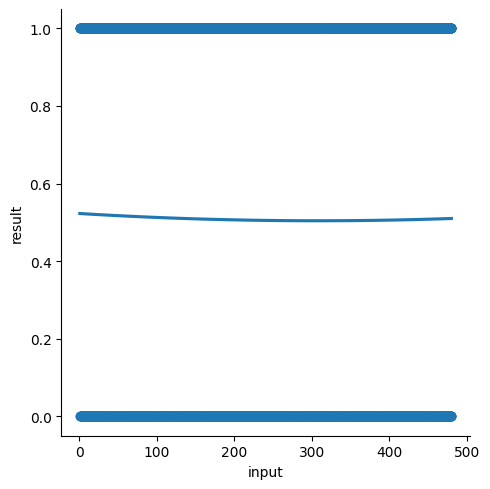

In [11]:
#plotting the Scatter plot to check relationship between input and result

sns.lmplot(x ="input", y ="result", data = df, order = 2, ci = None)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4627 entries, 0 to 4626
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   input   4627 non-null   int64
 1   result  4627 non-null   int64
dtypes: int64(2)
memory usage: 72.4 KB


In [286]:
# scaler = StandardScaler()
# df = scaler.fit_transform(df)

In [13]:
scaler = StandardScaler()

In [14]:
X = df['input']
y = df['result']


# scaler.fit(X.values.reshape(-1,1))
# scaler.fit(y.values.reshape(-1,1))
y.shape

(4627,)

In [15]:
df.ndim

2

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state= 2529)

In [17]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3100, 1), (1527, 1), (3100, 1), (1527, 1))

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.09172947],
       [ 0.58222826],
       [ 0.62488033],
       ...,
       [ 1.10116178],
       [-1.21626733],
       [-1.37976693]])

## Gaussian Naive Bayes classifier

In [23]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

/home/rahul/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [24]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(accuracy_score(y_test, y_pred))

Model accuracy score: 0.5075
0.5075311067452521


In [26]:
# Compare the train-set and test-set accuracy¶

y_pred_train = gnb.predict(X_train)

y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5097


In [28]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  0 752]
 [  0 775]]

True Positives(TP) =  0

True Negatives(TN) =  775

False Positives(FP) =  752

False Negatives(FN) =  0


## The confusion matrix shows 775 + 752 = 1527 correct predictions and 0 + 0 = 0 incorrect predictions.

<AxesSubplot:>

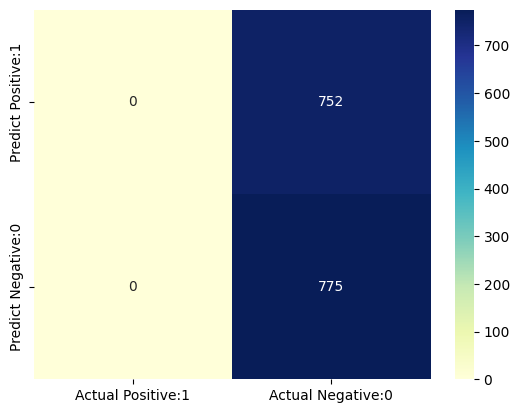

In [29]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       752
           1       0.51      1.00      0.67       775

    accuracy                           0.51      1527
   macro avg       0.25      0.50      0.34      1527
weighted avg       0.26      0.51      0.34      1527



/home/rahul/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rahul/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rahul/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [32]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.5075


In [33]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.4925


In [34]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Precision : 0.0000
Recall or Sensitivity : nan


/tmp/ipykernel_19031/2071582461.py:8: RuntimeWarning: invalid value encountered in divide
  recall = TP / float(TP + FN)


In [35]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


True Positive Rate : nan
False Positive Rate : 0.4925


/tmp/ipykernel_19031/4200741437.py:1: RuntimeWarning: invalid value encountered in divide
  true_positive_rate = TP / float(TP + FN)


In [36]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5075


## DecisionTreeClassifier

In [37]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [38]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [39]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

print(accuracy_score(y_test, y_pred_gini))

Model accuracy score with criterion gini index: 0.5088
0.5088408644400786


In [41]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5110


In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5110
Test set score: 0.5088


[Text(0.4090909090909091, 0.875, 'X[0] <= -1.682\ngini = 0.5\nsamples = 3100\nvalue = [1520, 1580]'),
 Text(0.18181818181818182, 0.625, 'X[0] <= -1.689\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6363636363636364, 0.625, 'X[0] <= 1.702\ngini = 0.5\nsamples = 3086\nvalue = [1518, 1568]'),
 Text(0.45454545454545453, 0.375, 'X[0] <= 1.688\ngini = 0.5\nsamples = 3073\nvalue = [1515, 1558]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.5\nsamples = 3059\nvalue = [1506, 1553]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.8181818181818182, 0.375, 'X[0] <= 1.709\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

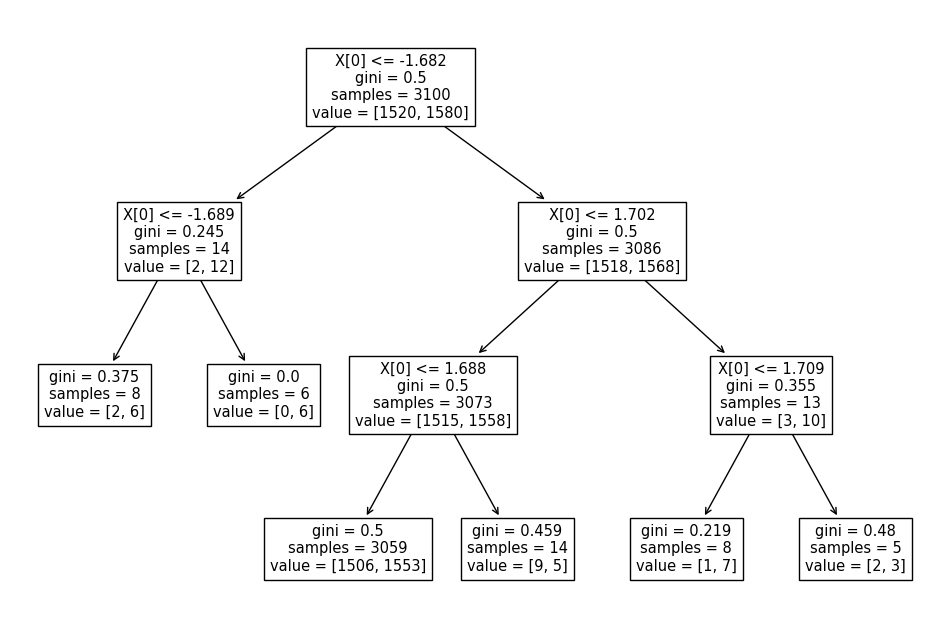

In [48]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [49]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [50]:
y_pred_en = clf_en.predict(X_test)
y_pred_en

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print(accuracy_score(y_test, y_pred_en))

Model accuracy score with criterion entropy: 0.5088
0.5088408644400786


In [52]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


Training-set accuracy score: 0.5110


In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5110
Test set score: 0.5088


[Text(0.4090909090909091, 0.875, 'X[0] <= -1.682\nentropy = 1.0\nsamples = 3100\nvalue = [1520, 1580]'),
 Text(0.18181818181818182, 0.625, 'X[0] <= -1.689\nentropy = 0.592\nsamples = 14\nvalue = [2, 12]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6363636363636364, 0.625, 'X[0] <= 1.702\nentropy = 1.0\nsamples = 3086\nvalue = [1518, 1568]'),
 Text(0.45454545454545453, 0.375, 'X[0] <= 1.688\nentropy = 1.0\nsamples = 3073\nvalue = [1515, 1558]'),
 Text(0.36363636363636365, 0.125, 'entropy = 1.0\nsamples = 3059\nvalue = [1506, 1553]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.94\nsamples = 14\nvalue = [9, 5]'),
 Text(0.8181818181818182, 0.375, 'X[0] <= 1.709\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.971\nsamples = 5\nvalue

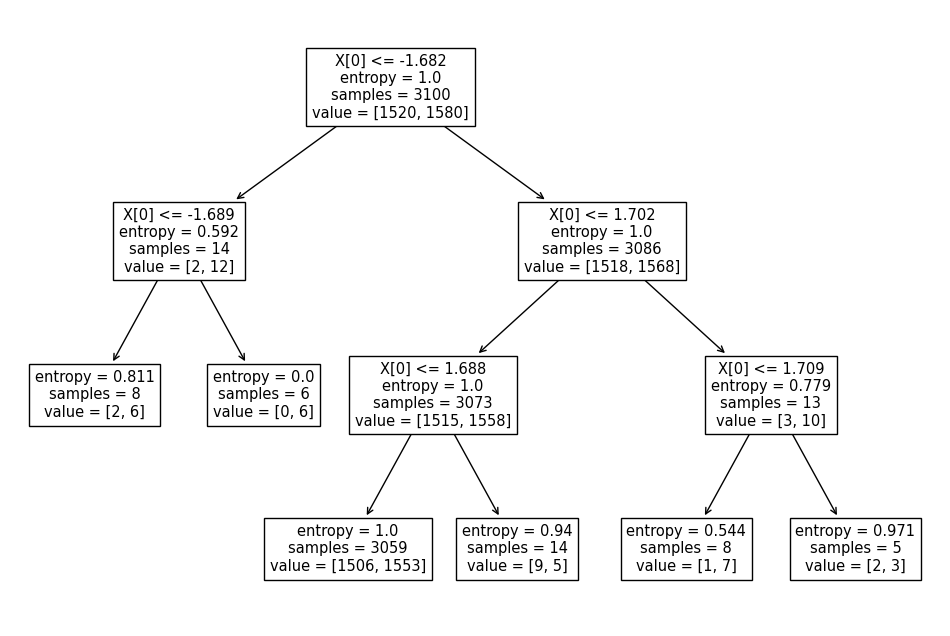

In [55]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [56]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  4 748]
 [  2 773]]


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       752
           1       0.51      1.00      0.67       775

    accuracy                           0.51      1527
   macro avg       0.59      0.50      0.34      1527
weighted avg       0.59      0.51      0.35      1527



## Logistic Regressioin

In [65]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


/home/rahul/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [66]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
# probability of getting output as 0 - no rain

print(accuracy_score(y_test, y_pred_test))


logreg.predict_proba(X_test)[:,0]

0.5075311067452521


array([0.49071525, 0.49275198, 0.4929291 , ..., 0.49490704, 0.48528567,
       0.48460719])

In [73]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.50928475, 0.50724802, 0.5070709 , ..., 0.50509296, 0.51471433,
       0.51539281])

In [74]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5075


In [75]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.5097
Test set score: 0.5075


In [76]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.49071525, 0.50928475],
       [0.49275198, 0.50724802],
       [0.4929291 , 0.5070709 ],
       [0.4898003 , 0.5101997 ],
       [0.49390328, 0.50609672],
       [0.49065622, 0.50934378],
       [0.49343095, 0.50656905],
       [0.49124655, 0.50875345],
       [0.48617073, 0.51382927],
       [0.48549218, 0.51450782]])

In [77]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.490715,0.509285
1,0.492752,0.507248
2,0.492929,0.507071
3,0.489800,0.510200
4,0.493903,0.506097
5,0.490656,0.509344
6,0.493431,0.506569
7,0.491247,0.508753
8,0.486171,0.513829
9,0.485492,0.514508


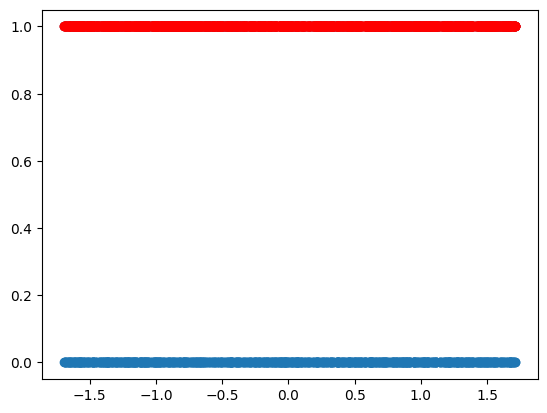

In [78]:
import matplotlib.pyplot as plt
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_test, c="red")
plt.show()